# Exploratory Analysis

**This note book do an exploratory analysis on the data**

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
# Read in the data set
df_pickup_JFK = pd.read_csv('../data/curated/JFK_pickup_data.csv')
df_arrival_flight_JFK = pd.read_csv('../data/curated/JFK_arrival_flight_data.csv')

In [3]:
df_pickup_JFK.head()

,trip_duration,weekend,weekday,[0-1],[1-2],[2-3],[3-4],[4-5],[5-6],[6-7],...,[20-21],[21-22],[22-23],morning_rush,evening_rush,trip_distance,total_surcharge,fare_amount,tip_amount,tip_ratio
0,29.283333,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,18.20,6.92,52.0,0.00,0.000000
1,22.616667,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,9.93,1.30,30.0,6.26,16.666667
2,10.650000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,4.30,1.30,14.5,3.95,20.000000
3,30.350000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,18.39,1.30,50.5,10.36,16.666667
4,30.750000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,23.47,1.30,61.5,12.56,16.666667


In [4]:
df_arrival_flight_JFK.head()

,flight_id,departure_airport,arrival_airport,arrival_hour,[0-1],[1-2],[2-3],[3-4],[4-5],[5-6],...,[14-15],[15-16],[16-17],[17-18],[18-19],[19-20],[20-21],[21-22],[22-23],elapsed_time_flight_minutes
0,0,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
1,1,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
2,2,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
3,3,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
4,4,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,84


**Plots histogram for total trips pick up at JFK**

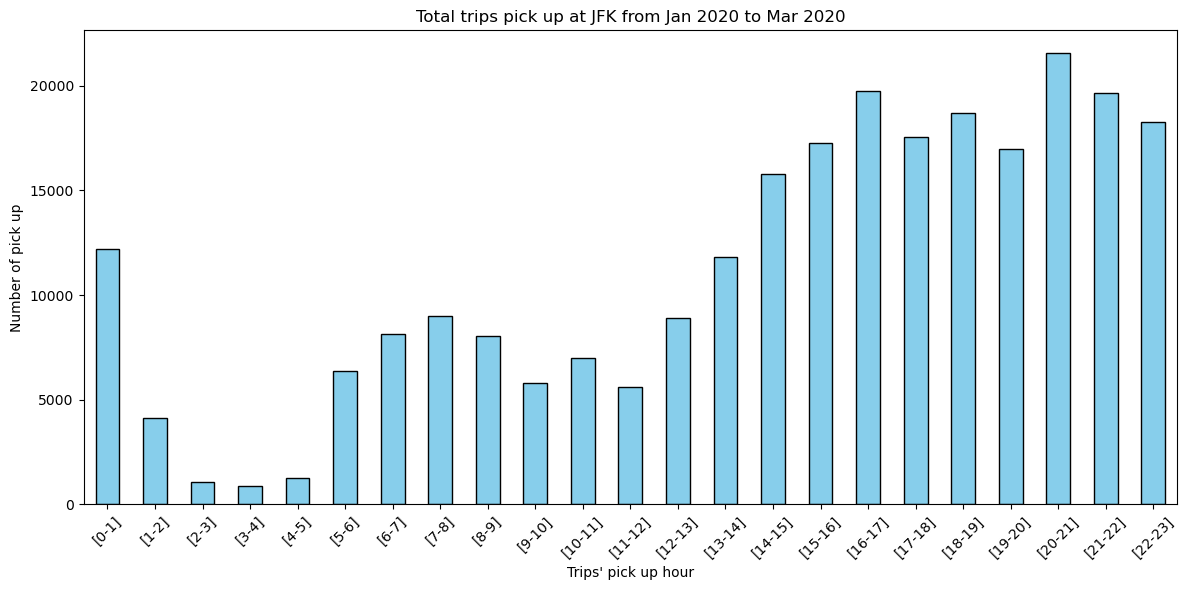

In [5]:
# Filter out the hourly interval columns
hourly_cols_taxi = [col for col in df_pickup_JFK.columns if '-' in col]

# Sum the hourly interval columns
hourly_counts_taxi = df_pickup_JFK[hourly_cols_taxi].sum()

# Plotting
plt.figure(figsize=(12, 6))
hourly_counts_taxi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total trips pick up at JFK from Jan 2020 to Mar 2020')
plt.xlabel("Trips' pick up hour")
plt.ylabel('Number of pick up')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/trips_pickup_count_JFK.png')
plt.show()

**Plots histogram for total number of flights arrive at JFK**

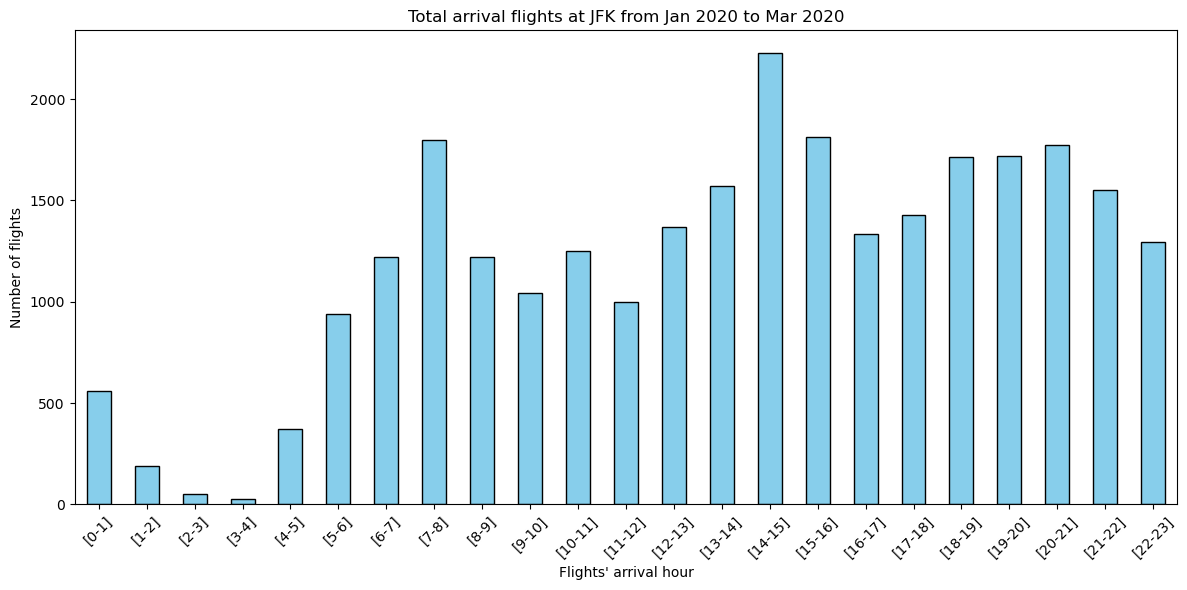

In [6]:
# Filter out the hourly interval columns
hourly_cols_flight = [col for col in df_arrival_flight_JFK.columns if '-' in col]

# Sum the hourly interval columns
hourly_counts_flight = df_arrival_flight_JFK[hourly_cols_flight].sum()

# Plotting
plt.figure(figsize=(12, 6))
hourly_counts_flight.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total arrival flights at JFK from Jan 2020 to Mar 2020')
plt.xlabel("Flights' arrival hour")
plt.ylabel('Number of flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/flights_arrival_count_JFK.png')
plt.show()

**Numerical Answer**

In [7]:
# How many number trips to JFK during weekday
weekday_trips_count = df_pickup_JFK[df_pickup_JFK['weekday'] == 1].shape[0]
weekday_trips_count

193471

In [8]:
# How many number trips to JFK during weekend
weekend_trips_count = df_pickup_JFK[df_pickup_JFK['weekend'] == 1].shape[0]
weekend_trips_count

76170

In [9]:
# How many trips to JFK during morning rush hour
moring_rush_trips_count = df_pickup_JFK[df_pickup_JFK['morning_rush'] == 1].shape[0]
weekend_trips_count

76170

In [10]:
# How many trips to JFK during evening rush hour
evening_rush_trips_count = df_pickup_JFK[df_pickup_JFK['evening_rush'] == 1].shape[0]
evening_rush_trips_count

53188

In [11]:
# How many trips to JFK during weekday morning rush hour
weekday_morning_count = df_pickup_JFK[(df_pickup_JFK['weekday'] == 1) & (df_pickup_JFK['morning_rush'] == 1)].shape[0]
weekday_morning_count

17002

In [12]:
# How many trips to JFK during weekday evening rush hour
weekday_evening_count = df_pickup_JFK[(df_pickup_JFK['weekday'] == 1) & (df_pickup_JFK['evening_rush'] == 1)].shape[0]
weekday_evening_count

37779

In [13]:
# How many trips to JFK during weekend morning rush hour
weekend_morning_count = df_pickup_JFK[(df_pickup_JFK['weekend'] == 1) & (df_pickup_JFK['morning_rush'] == 1)].shape[0]
weekend_morning_count

5840

In [14]:
# How many trips to JFK during weekend evening rush hour
weekend_evening_count = df_pickup_JFK[(df_pickup_JFK['weekday'] == 1) & (df_pickup_JFK['morning_rush'] == 1)].shape[0]
weekend_evening_count

17002

**Descriptive Analysis**

In [15]:
# Descriptive statistic for tip_amount
tip_amount_stats = df_pickup_JFK['tip_amount'].describe()
tip_amount_stats

count    269641.000000
mean          9.553354
std           4.463697
min           0.000000
25%           6.660000
50%          10.320000
75%          12.280000
max         445.680000
Name: tip_amount, dtype: float64

In [16]:
# Descriptive statistic for tip_amount
tip_ratio_stats = df_pickup_JFK['tip_ratio'].describe()
tip_ratio_stats

count    269641.000000
mean         14.832099
std           5.185378
min           0.000000
25%          13.157895
50%          16.662144
75%          16.666667
max          93.795094
Name: tip_ratio, dtype: float64

**Distribution of tip_amount and tip_ratio**

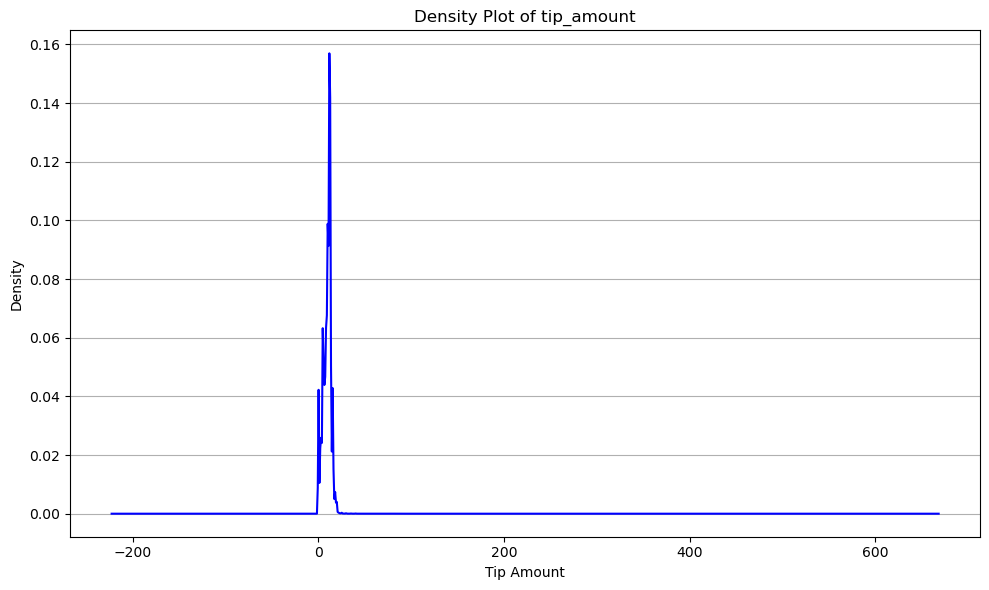

In [17]:
# Density plot for tip_amount

plt.figure(figsize=(10, 6))
df_pickup_JFK['tip_amount'].plot.kde(color='blue')
plt.title('Density Plot of tip_amount')
plt.xlabel('Tip Amount')
plt.ylabel('Density')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../plots/tip_amount_density_JFK.png')
plt.show()

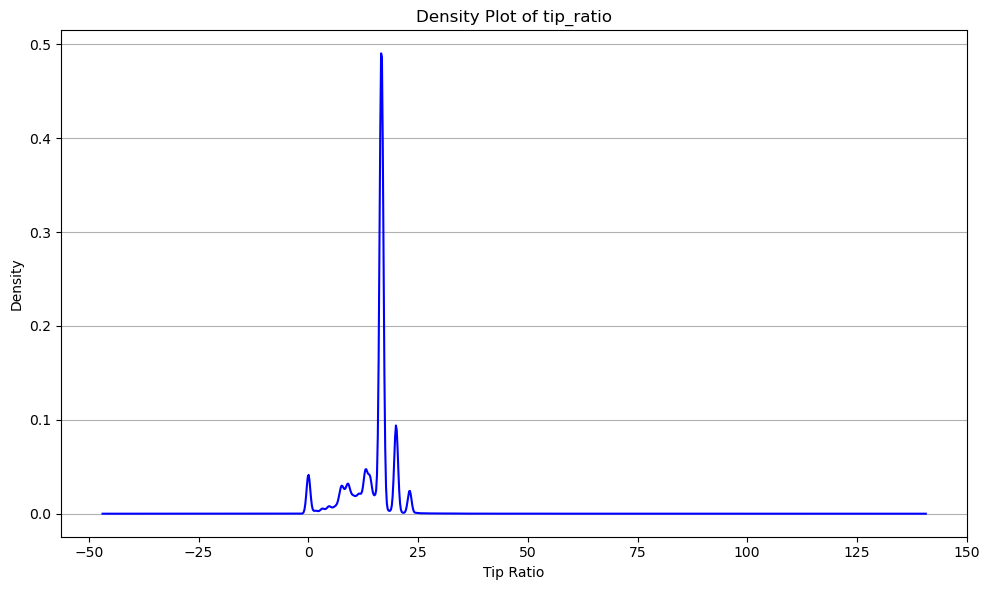

In [18]:
# Density plot for tip_ratio
plt.figure(figsize=(10, 6))
df_pickup_JFK['tip_ratio'].plot.kde(color='blue')
plt.title('Density Plot of tip_ratio')
plt.xlabel('Tip Ratio')
plt.ylabel('Density')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../plots/tip_ratio_density_JFK.png')
plt.show()

**Correlation heat map**

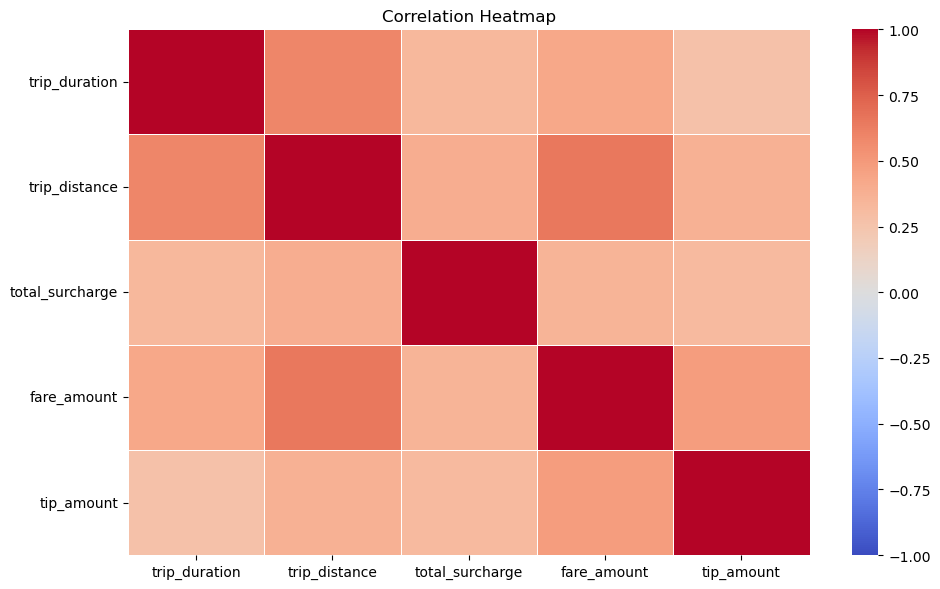

In [19]:
# Calculate the correlation matrix
# Nature of Correlation Coefficient: The Pearson correlation coefficient, 
# which is commonly used in correlation heatmaps, measures linear relationships 
# between two continuous variables. When applied to an indicator variable and a continuous variable, 
# it calculates the point-biserial correlation, which might not be as intuitive as a standard Pearson correlation. 
# For two indicator variables, it calculates the phi coefficient.
corr_matrix = df_pickup_JFK[['trip_duration', 'trip_distance', 'total_surcharge', 'fare_amount', 'tip_amount']].corr()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../plots/features_correlation_heatmap_JFK.png')
plt.show()

**Pairwise plots**

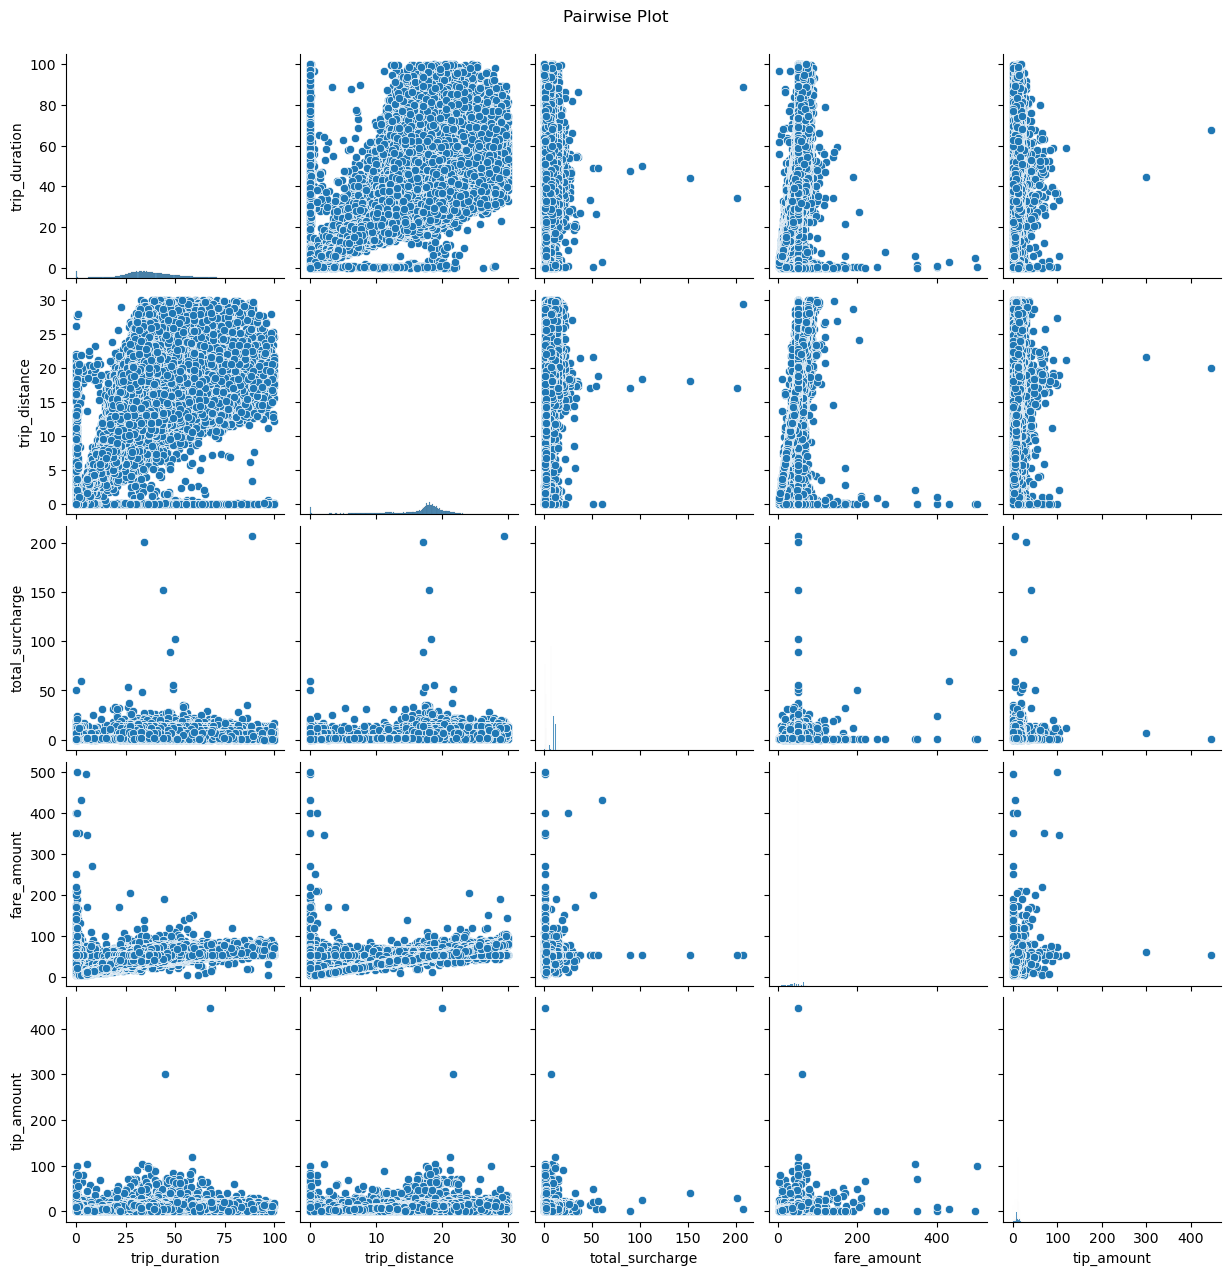

In [20]:
# Plotting pairwise plot

# Exclude all indicator variable
# Limited Variability: Since indicator variables take on a very limited range of values (usually just two: 0 and 1), 
# their scatter plots with other variables often result in two horizontal or vertical lines of data points. 
# This doesn't provide much insight into relationships or distributions.

sns.pairplot(df_pickup_JFK[['trip_duration', 'trip_distance', 'total_surcharge', 'fare_amount', 'tip_amount']])
plt.suptitle('Pairwise Plot', y=1.02)
plt.savefig('../plots/features_pairwise_JFK.png')
plt.show()